# CLASSIFICATION TECHNIQUES

In this class, we are going to:
1. Examine various classification techniques we have learned so far
2. Use Pipeline class to streamline workflows
3. Make predictions using the chosen classification technique based on 
the dataset

The data set we are going to use is the phishing_data.csv where the 
outcome variable has three class labels:
a) 1: Genuine website
b) 0: Potentially phishing website
c) -1: Phishing website

The accompanying PDF document provides some info about the features/variables
since the source of the dataset did not provide that information.

# STEP 1: READ THE DATA

In [1]:
import pandas as pd

phishing_data = pd.read_csv('phishing_data.csv')
phishing_data.head()

,SFH,popUpWindow,SSLFinal_State,Request_URL,URL_of_Anchor,Web_Traffic,URL_Length,Age_of_Domain,Having_IP_Address,Result
0,1,-1,1,-1,-1,1,1,1,0,0
1,-1,-1,-1,-1,-1,0,1,1,1,1
2,1,-1,0,0,-1,0,-1,1,0,1
3,1,0,1,-1,-1,0,1,1,0,0
4,-1,-1,1,-1,0,0,-1,1,0,1


## STEP 2: SPLIT THE DATA

In [2]:
from sklearn.model_selection import train_test_split

X = phishing_data.drop('Result', axis=1) #drop the last column (ie., Result)
y = phishing_data['Result'] #Result is the outcome variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#check data
X_train.head()

,SFH,popUpWindow,SSLFinal_State,Request_URL,URL_of_Anchor,Web_Traffic,URL_Length,Age_of_Domain,Having_IP_Address
777,0,-1,0,0,0,-1,0,1,0
872,-1,-1,-1,-1,-1,-1,0,1,0
482,1,0,1,1,1,0,0,1,0
526,-1,0,0,-1,-1,0,-1,1,0
344,-1,0,-1,1,1,0,0,1,0


## STEP 3: LOAD THE REQUIRED LIBRARIES

In [3]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, log_loss
from sklearn.preprocessing import RobustScaler


## STEP 4: TRAIN VARIOUS CLASSIFICATION MODELS

In [16]:
names = ["Logististic Regression", "Nearest Neighbors", "Linear SVM", "RBF SVM",          
         "Decision Tree", "Naive Bayes"]

scores = [] #list variable to hold classification scores

classifiers = [
    LogisticRegression(),
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),   
    DecisionTreeClassifier(max_depth=5),    
    GaussianNB()]


for clf in classifiers:
    pipe = Pipeline([("scaler",RobustScaler()),("classifier",clf)])
    pipe.fit(X_train, y_train)
    
    score = pipe.score(X_test, y_test)
    scores.append(score)
    
    print(clf)
    print("Model score: %.3f" %(score))
    print("\n -------------------------------- \n")
    
    

LogisticRegression()
Model score: 0.850

 -------------------------------- 

KNeighborsClassifier(n_neighbors=3)
Model score: 0.870

 -------------------------------- 

SVC(C=0.025, kernel='linear')
Model score: 0.835

 -------------------------------- 

SVC(C=1, gamma=2)
Model score: 0.882

 -------------------------------- 

DecisionTreeClassifier(max_depth=5)
Model score: 0.838

 -------------------------------- 

GaussianNB()
Model score: 0.823

 -------------------------------- 



In [17]:
scores_df = pd.DataFrame(zip(names, scores), columns=["Classifier", "Accuracy"])

print(scores_df)

               Classifier  Accuracy
0  Logististic Regression  0.849558
1       Nearest Neighbors  0.870206
2              Linear SVM  0.834808
3                 RBF SVM  0.882006
4           Decision Tree  0.837758
5             Naive Bayes  0.823009


## PERFORM PREDICTIONS WITH THE CHOSEN MODEL

Based on predictive accuracy of the various models above, we can use either 
KNN or RBF SVM classifiers to perform out-of-sample predictions.
Below, we make out-of-sample predictions for both classifiers
using sample data for a new website of given characteristics (X_new).

### Prediction using KNN Classifier

In [6]:
#sample data (X_new)
X_new = pd.DataFrame([[-1,1,1,0,0,0,1,0,-1]], columns=X_train.columns)

#fit the model using training set once again.

knn = KNeighborsClassifier(3)

knn.fit(X_train, y_train)

#predict y for X_new
y_pred_phi = knn.predict(X_new)


#### Define functions to display prediction results

In [7]:
def display_predicted_class(y_pred):
    label =''
    if y_pred == 1:
        label ='"Genuine website"'
    
    elif y_pred == -1:
        label ='"Phishing website"'   
    
    else:
        label = '"Potentially phising website"'
    print('Predicted class membership for website is',y_pred,', which means',label)  

In [8]:
def display_predicted_probability(y_pred, pred_prob):
    prob_label = ''
    prob =0
    if y_pred ==- 1:
        prob_label ='", which mean the probability of being a phishing website is"'
        prob = pred_prob[:,0]
    
    elif y_pred == 1:
        prob_label ='", which mean the probability of being a phishing website is"'
        prob = pred_prob[:,2]
     
    else:
        prob_label ='", which mean the probability of being a phishing website is"'
        prob = pred_prob[:,1]

    print('Predicted probability for the website is',prob, prob_label, prob)   
    
    

In [9]:
#predicted class from knn Classifier
display_predicted_class(y_pred_phi)

Predicted class membership for website is [-1] , which means "Phishing website"


In [10]:
#Predicted Probability from knn Classifier
pred_prob_phi = knn.predict_proba(X_new)

display_predicted_probability(y_pred_phi, pred_prob_phi)


Predicted probability for the website is [1.] ", which mean the probability of being a phishing website is" [1.]


### Prediction using RBF SVM Classifier

In [11]:
#sample data (X_new)
X_new = pd.DataFrame([[-1,1,1,0,0,0,1,0,-1]], columns=X_train.columns)

svm = SVC(kernel="rbf", gamma=2, C=1, probability=True) # need to enable predict_proba

svm.fit(X_train, y_train)

y_pred_phi = svm.predict(X_new)

In [12]:
#predicted class from svm Classifier
display_predicted_class(y_pred_phi)

Predicted class membership for website is [-1] , which means "Phishing website"


In [13]:
#predicted probability from svm Classifier
pred_prob_phi = svm.predict_proba(X_new)

display_predicted_probability(y_pred_phi, pred_prob_phi)

Predicted probability for the website is [0.5243258] ", which mean the probability of being a phishing website is" [0.5243258]


#### Comparison of KNN and SVM Classifiers

From the above analysis, it appears KNN classifier is slightly more accurate in terms 
of predicted probability of being a phishing website

### Evaluation of KNN Classifier

#### Confusion Matrix

<Axes: xlabel='Predicted', ylabel='Actual'>

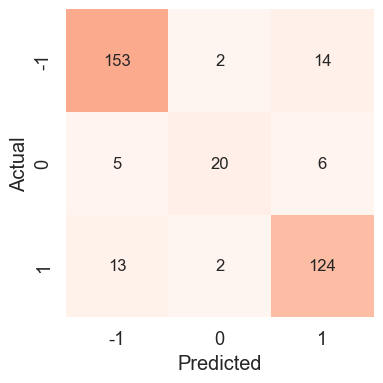

In [14]:
y_pred = knn.predict(X_test)

from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

data = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (4,4))
sns.set(font_scale=1.2)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 12}, cbar=False,
          vmax=500, square=True, fmt="d", cmap="Reds")# font size

From the confusioin matrix above, we see that actual number of phishing websites 
(class label= -1) in the sample is 169 (154+2+13), and our KNN classifier predicted 154 websites to be phishing websites. 

The actual number of phishing websites in the sample is the same as support in the classification
report below. Precision = (TP/(TP+FP)) = 154/(154+6+12) = 0.895, as shown in the 
classfication report.  Recall = (TP/(TP+FN)= 154/(154+2+13) = 0.91 as shown in the
classfication report.

From the confusioin matrix above, we see that actual number of genuine websites 
(class label= 1) in the sample is 139 (12+1+126), and our KNN classifier predicted 126 websites to be genuine websites.

Again, the actual number of genuine websites in the sample is the same as support in the classification report below. Precision = (TP/(TP+FP)) = 126/(126+6+13) = 0.867, as shown in the 
classfication report.  Recall = (TP/(TP+FN)= 126/(126+1+12) = 0.906 as shown in the
classfication report.

From the confusioin matrix above, we see that actual number of potentially phishing websites 
(class label= 0) in the sample is 31 (6+19+6), and our KNN classifier predicted 19 websites to be potentially phishing websites.

Again, the actual number of potentially phishing websites in the sample is the same as support in the classification report below. 
Precision = (TP/(TP+FP)) = 19/(2+19+1) = 0.86, as shown in the 
classfication report.  Recall = (TP/(TP+FN)= 19/(6+19+6) = 0.61 as shown in the
classfication report.

We can see from these results that the model produces more accurate predictions the larger the test sample. The weighted average accuracy for the model is 0.88 (or 88%) as can be seen from
the classification report.

#### Classification Report

In [15]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.89      0.91      0.90       169
           0       0.83      0.65      0.73        31
           1       0.86      0.89      0.88       139

    accuracy                           0.88       339
   macro avg       0.86      0.81      0.83       339
weighted avg       0.88      0.88      0.87       339



#### ROC Curve

Note: ROC Curve is mainly a feature for binary classification problems. 
While some manipulation could be done to generate ROC curve for multi-class classification,
It is not necessary for us to do it here. Confusion matrrix and classification report
are adequate to assess model's predictive performance